In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##Reading file
df1 = pd.read_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Excellent Store Challenge/train.csv')
df2 = pd.read_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Excellent Store Challenge/test.csv')

In [3]:
##Checkpoint
data1 = df1.copy()
data2 = df2.copy()

In [4]:
##To display entire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',  None)
df1.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
##Fill null item weight with mean weight.
df1['Item_Weight'].fillna(np.mean(df1['Item_Weight']), inplace=True)
df2['Item_Weight'].fillna(np.mean(df2['Item_Weight']), inplace=True)

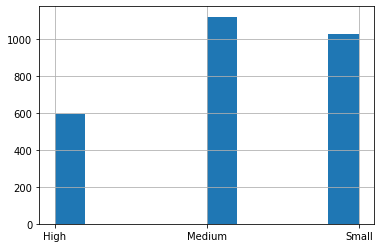

In [6]:
##Getting the modal Store Size
df1['Store_Size'].hist()
##Medium is the Modal Store Size

In [7]:
## Fill null store sizes with mode (Medium)
df1['Store_Size'].fillna('Medium', inplace=True)
df2['Store_Size'].fillna('Medium', inplace=True)

In [8]:
##Putting Store Location Type in categories 0,1,2
df1['Store_Location_Type'] = df1['Store_Location_Type'].astype('category')
df2['Store_Location_Type'] = df2['Store_Location_Type'].astype('category')
df1['Store_Location_Type'] = df1['Store_Location_Type'].cat.codes
df2['Store_Location_Type'] = df2['Store_Location_Type'].cat.codes

In [9]:
##Putting Store Type in categories 0,1,2,3
df1['Store_Type'] = df1['Store_Type'].astype('category')
df2['Store_Type'] = df2['Store_Type'].astype('category')
df1['Store_Type'] = df1['Store_Type'].cat.codes
df2['Store_Type'] = df2['Store_Type'].cat.codes

In [10]:
##Putting Store Size in categories 0,1,2
df1['Store_Size'] = df1['Store_Size'].astype('category')
df2['Store_Size'] = df2['Store_Size'].astype('category')
df1['Store_Size'] = df1['Store_Size'].cat.codes
df2['Store_Size'] = df2['Store_Size'].cat.codes

In [11]:
##Putting Item_Sugar_Content in categories 0,1,2
df1['Item_Sugar_Content'] = df1['Item_Sugar_Content'].astype('category')
df2['Item_Sugar_Content'] = df2['Item_Sugar_Content'].astype('category')
df1['Item_Sugar_Content'] = df1['Item_Sugar_Content'].cat.codes
df2['Item_Sugar_Content'] = df2['Item_Sugar_Content'].cat.codes

In [12]:
##Getting columns in X and Y for linear regression
y1 = df1['Item_Store_Returns']
X1 = df1.drop(['Item_ID', 'Item_Store_ID', 'Store_Start_Year', 'Item_Store_Returns'], axis=1)
X2 = df2.drop(['Item_ID', 'Item_Store_ID', 'Store_Start_Year'], axis =1)

In [13]:
##Dummies
X1 = pd.get_dummies(X1)
X2 = pd.get_dummies(X2)

In [14]:
## Linear Regression
Reg = LinearRegression()

In [15]:
##Fitting the data
Reg.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
##Accuracy of model
Reg.score(X1, y1)

0.3436733235171793

In [17]:
y2 = Reg.predict(X2)
y2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 33)

In [20]:
##Saving the prediction
z = pd.read_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Excellent Store Challenge/SampleSubmission.csv')

output = pd.DataFrame({'Item_Id':z['Item_Store_ID'], 'Item_Store_Returns': y2})
output.to_csv('C:/Users/TOTAGOUSER4/Documents/Totago Technologies/David/Data Science/Projects/DSN Excellent Store Challenge/my_prediction2.csv', index = False)